# Выделение признаков факторизацией матрицы

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF

# Создаём временные ряды и визуализируем их

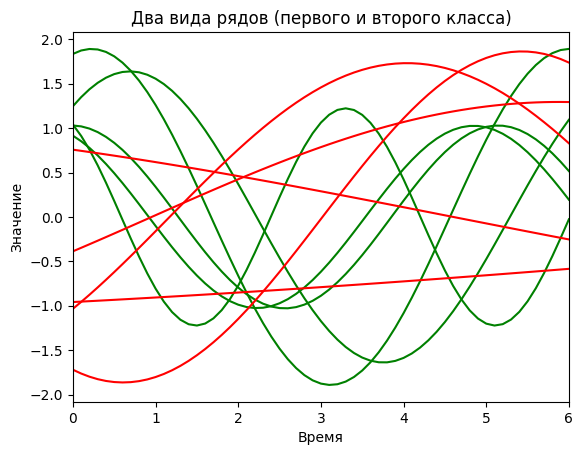

data.shape = (122000, 4)
data.id.nunique() = 2000


,t,y,class,id
0,0.0,3.245872,1,0
1,0.1,3.348260,1,0
2,0.2,3.436487,1,0


In [3]:
N = 1000 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    A = 1 + random.random()        ## амплитуда
    w = 1 + random.random()        ## частота
    ph = np.pi * random.random()   ## фаза
    
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.sin(t*w + ph)  ## значения временного ряда
    df['class'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = data._append(df)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['class'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = data._append(df)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

In [4]:
data

,t,y,class,id
0,0.0,3.245872,1,0
1,0.1,3.348260,1,0
2,0.2,3.436487,1,0
3,0.3,3.509626,1,0
4,0.4,3.566908,1,0
...,...,...,...,...
56,5.6,2.557254,0,1999
57,5.7,2.541031,0,1999
58,5.8,2.524664,0,1999
59,5.9,2.508156,0,1999


# Выделение признаков

## Поворачиваем таблицу

In [5]:
dataPivoted = data.pivot(index='id', columns='t', values='y')
dataPivoted = dataPivoted.reset_index(drop=True)
dataPivoted['label'] = 0
dataPivoted['label'].iloc[N:] = 1
print('dataPivoted.shape =', dataPivoted.shape)
dataPivoted.head(3)

dataPivoted.shape = (2000, 62)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10372\3570508333.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataPivoted['label'].iloc[N:] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_10372\3570508333.py:4: SettingWithCopyWarning: 
A 

t,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,label
0,3.245872,3.348260,3.436487,3.509626,3.566908,3.607734,3.631673,3.638476,3.628070,3.600564,...,1.853265,2.021114,2.188733,2.354361,2.516261,2.672732,2.822132,2.962893,3.093538,0
1,3.038675,2.911656,2.757190,2.579924,2.385190,2.178845,1.967094,1.756307,1.552825,1.362766,...,0.791555,0.843384,0.929975,1.048725,1.196061,1.367552,1.558040,1.761795,1.972689,0
2,3.834684,3.873698,3.890587,3.885151,3.857455,3.807827,3.736850,3.645365,3.534449,3.405412,...,3.210000,3.360586,3.495104,3.611965,3.709790,3.787425,3.843954,3.878708,3.891279,0


In [6]:
dataPivoted

t,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,label
0,3.245872,3.348260,3.436487,3.509626,3.566908,3.607734,3.631673,3.638476,3.628070,3.600564,...,1.853265,2.021114,2.188733,2.354361,2.516261,2.672732,2.822132,2.962893,3.093538,0
1,3.038675,2.911656,2.757190,2.579924,2.385190,2.178845,1.967094,1.756307,1.552825,1.362766,...,0.791555,0.843384,0.929975,1.048725,1.196061,1.367552,1.558040,1.761795,1.972689,0
2,3.834684,3.873698,3.890587,3.885151,3.857455,3.807827,3.736850,3.645365,3.534449,3.405412,...,3.210000,3.360586,3.495104,3.611965,3.709790,3.787425,3.843954,3.878708,3.891279,0
3,3.028795,3.019053,2.994183,2.954554,2.900755,2.833582,2.754032,2.663286,2.562689,2.453733,...,3.026379,3.009935,2.978499,2.932537,2.872731,2.799967,2.715324,2.620060,2.515585,0
4,2.913963,2.851700,2.777199,2.691528,2.595919,2.491743,2.380496,2.263774,2.143254,2.020665,...,2.935772,2.878804,2.809208,2.727984,2.636298,2.535465,2.426934,2.312262,2.193095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.279344,2.162864,2.045738,1.928428,1.811397,1.695107,1.580015,1.466575,1.355235,1.246434,...,1.949538,2.066848,2.183892,2.300208,2.415336,2.528824,2.640223,2.749095,2.855010,1
1996,1.865940,1.845752,1.825587,1.805446,1.785332,1.765250,1.745201,1.725188,1.705214,1.685282,...,0.906985,0.891574,0.876322,0.861230,0.846301,0.831537,0.816940,0.802512,0.788255,1
1997,3.344069,3.408510,3.462886,3.506811,3.539969,3.562125,3.573120,3.572876,3.561394,3.538756,...,0.800699,0.891291,0.989795,1.095506,1.207669,1.325485,1.448110,1.574671,1.704263,1
1998,1.266426,1.291217,1.316731,1.342943,1.369826,1.397351,1.425492,1.454219,1.483502,1.513313,...,2.826845,2.847511,2.867311,2.886223,2.904229,2.921310,2.937449,2.952629,2.966835,1


## Факторизация положительно определённой матрицы
Non-negative matrix factorization (NNMF)

In [7]:
# train, test = np.split(dataPivoted, [int(0.6*len(dataPivoted))])
train, test = train_test_split(dataPivoted, test_size=0.4, random_state=43) 
print('train.shape =', train.shape)
print('test.shape  =', test.shape)

## составляем список колонок со временем
timeColumns = train.drop('label', axis=1).columns

## факторизуем (раскладываем исходную матрицу на две)
## описываем требования к разложению (основное - раскладываем на три компоненты)
model = NMF(n_components=3, init='nndsvd', random_state=0, tol=0.001, max_iter=5000, solver='cd')
## находим функции разложения и извлекаем их
model.fit(train[timeColumns])
H = model.components_
## получаем коэффициенты разложения для тренировочного и тестового сетов
W_train = model.transform(train[timeColumns])
W_test  = model.transform(test[timeColumns])

print('H.shape =', H.shape)
print('W_train.shape =', W_train.shape) # выделенные признаки
print('W_test.shape =',  W_test.shape)  # выделенные признаки

train.shape = (1200, 62)
test.shape  = (800, 62)
H.shape = (3, 61)
W_train.shape = (1200, 3)
W_test.shape = (800, 3)


## Визуализируем базисные функции (функции разложения)

Коэффициенты разложения для 1-элемента: [0.69043146 0.08312923 0.62143061]


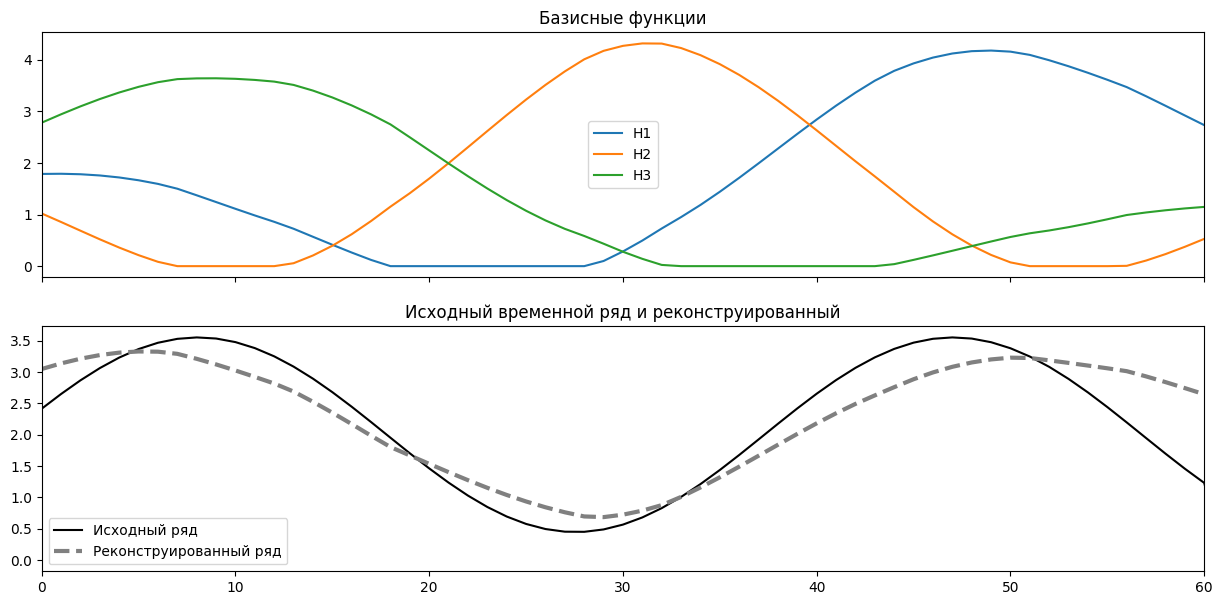

In [8]:
ind = 1

f, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True)
ax[0].plot(H[0,:])
ax[0].plot(H[1,:])
ax[0].plot(H[2,:])
# ax[0].plot(H[3,:])
# ax[0].plot(H[4,:])
# ax[0].legend(['H1', 'H2', 'H3', 'H4', 'H5'])
ax[0].legend(['H1', 'H2', 'H3'])
ax[0].set_title("Базисные функции")


print(f'Коэффициенты разложения для {ind}-элемента: {W_train[ind]}')
y = train.iloc[ind].values

ax[1].plot(y, 'k')

reconstr = W_train[ind].dot(H)
ax[1].plot(reconstr, color='gray', linestyle='--', lw=3)
ax[1].set_title('Исходный временной ряд и реконструированный')
ax[1].legend(['Исходный ряд', 'Реконструированный ряд'])
ax[1].set_xlim([0, len(y)-2])
plt.show()

# Разбивка на тренировочный и тестовый наборы

In [9]:
trainSet = pd.DataFrame()
testSet = pd.DataFrame()

## записываем фичи в дейтафрейм
for i in range(np.shape(W_train)[1]):
    trainSet['W_' + str(i)] = W_train[:,i]
    
for i in range(np.shape(W_test)[1]):
    testSet['W_' + str(i)] = W_test[:,i]
    
## добавляем классы исходного ряда    
trainSet['label'] = train.label.values
testSet['label']  = test.label.values        

print("trainSet.shape =", trainSet.shape)
print("testSet.shape =",  testSet.shape)
print()
print('Value counts train:\n', trainSet.label.value_counts())
print()
print('Value counts test:\n', testSet.label.value_counts())

trainSet.head(3)

trainSet.shape = (1200, 4)
testSet.shape = (800, 4)

Value counts train:
 label
1    602
0    598
Name: count, dtype: int64

Value counts test:
 label
0    402
1    398
Name: count, dtype: int64


,W_0,W_1,W_2,label
0,0.675387,0.000000,0.674082,0
1,0.690431,0.083129,0.621431,0
2,0.296551,0.588453,0.753541,1


# Машинное обучение

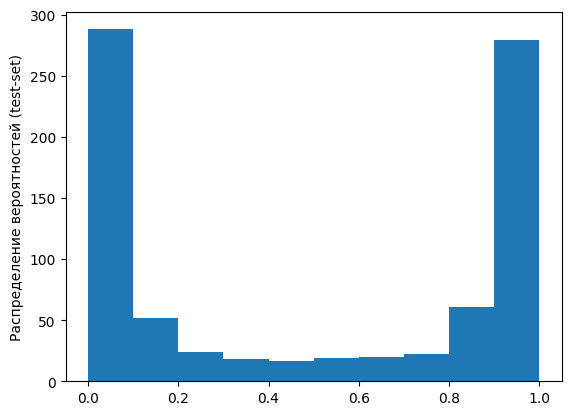

  features  importances
0      W_0     0.392670
1      W_1     0.316574
2      W_2     0.290756

   Pos  Neg
0  372   30
1   28  370

AUC = 0.981  Точность = 0.927



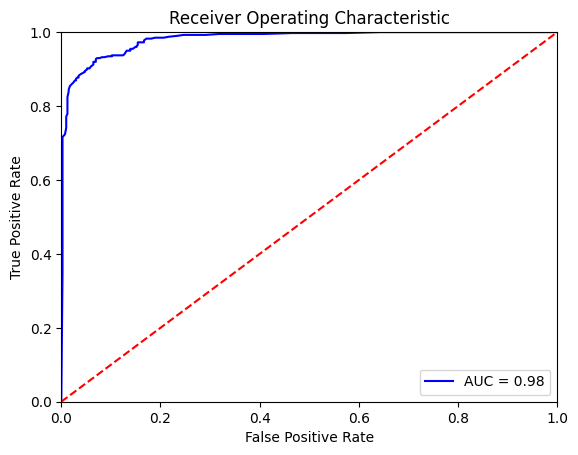

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

featureList = trainSet.drop('label', axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1] ## вероятности

## визуализируем вероятности для предсказаний
import matplotlib.pyplot as plt
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()

## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

# confusion matrix
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

## считаем матрицу ошибок
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0]
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Используйте этот код для решения заданий.

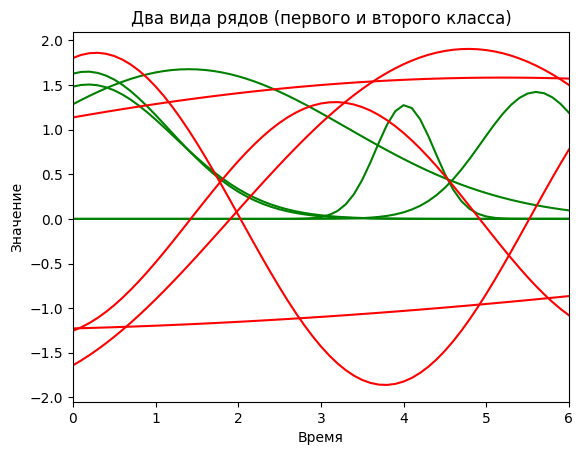

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan
N = 100 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints)

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2*np.pi*random.random()
    a1 = 5*random.random()
    A = 1 + random.random()

    df['t']  = t                   ## ось времени
    df['y']  = A*np.exp(-(df.t-t0)**2/2/a1)  ## значения временного ряда
    df['label'] = 1                ## класс временного ряда
    df['id'] = i                   ## номер временного ряда

    data = data._append(df)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g')

## генерируем семплы второго класса
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза

    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['label'] = 0                  ## класс временного ряда
    df['id'] = i                     ## номер временного ряда

    data = data._append(df)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r')

## cдвигаем все значения вверх, чтобы все значения были положительными
data['y'] = data.y + np.abs(data.y.min())

plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

# Задание 8.21.1

Поверните дейтафрейм так, чтобы единицы времени являлись названием колонок. Используйте для этого функцию pivot. Укажите значение колонки "0.8" в первой строке.

In [12]:

dataPivoted = data.pivot(index='id', columns='t', values='y')
dataPivoted = dataPivoted.reset_index(drop=True)
dataPivoted['label'] = 0
dataPivoted['label'].iloc[N:] = 1

dataPivoted.head(3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10372\1088576783.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataPivoted['label'].iloc[N:] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_10372\1088576783.py:4: SettingWithCopyWarning: 
A 

t,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,label
0,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,...,1.962614,1.959628,1.958462,1.958044,1.957907,1.957865,1.957853,1.957850,1.957850,0
1,3.241556,3.289581,3.335656,3.379460,3.420678,3.459009,3.494166,3.525883,3.553915,3.578042,...,2.194464,2.170989,2.149323,2.129392,2.111119,2.094421,2.079213,2.065405,2.052910,0
2,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,...,3.134488,3.234827,3.312206,3.361605,3.379718,3.365310,3.319365,3.244966,3.146961,0


# Задание 8.21.2

Сделайте разбиение на тренировочный и тестовый датасеты при помощи train_test_split c параметрами test_size=0.4, random_state=42. После сделайте разложение при помощи NMF с параметрами: n_components=5, init='nndsvd', random_state=42, tol=0.001, max_iter=5000, solver='cd'. Натенируйте модель, получите функции разложения Н и коэффициенты разложения W_train, W_test для тренировочного и тестового сетов. Не забудьте убрать колонку label перед тренировкой.

Укажите значение H[0][0] с точностью до второго знака после запятой.

In [13]:
train, test = train_test_split(dataPivoted, test_size=0.4, random_state=42)

## составляем список колонок со временем
timeColumns = train.drop('label', axis=1).columns

## факторизуем (раскладываем исходную матрицу на две)
## описываем требования к разложению (основное - раскладываем на три компоненты)
model = NMF(n_components=5, init='nndsvd', random_state=42, tol=0.001, max_iter=5000, solver='cd')
## находим функции разложения и извлекаем их
model.fit(train[timeColumns])
H = model.components_
## получаем коэффициенты разложения для тренировочного и тестового сетов
W_train = model.transform(train[timeColumns])
W_test  = model.transform(test[timeColumns])

H[0][0]

0.0

In [14]:
H

array([[0.00000000e+00, 6.27418523e-03, 5.53613820e-02, 1.07092960e-01,
        1.60504098e-01, 2.09714275e-01, 2.51266312e-01, 2.96986742e-01,
        3.48904178e-01, 4.07341922e-01, 4.72929517e-01, 5.35711952e-01,
        6.02794794e-01, 6.78896256e-01, 7.65499632e-01, 8.62761021e-01,
        9.69212937e-01, 1.08390746e+00, 1.20454866e+00, 1.32271124e+00,
        1.43352681e+00, 1.53309823e+00, 1.61874655e+00, 1.68894779e+00,
        1.74308196e+00, 1.78113048e+00, 1.80341712e+00, 1.81043023e+00,
        1.80271744e+00, 1.78089551e+00, 1.74840175e+00, 1.70338174e+00,
        1.64549826e+00, 1.57342698e+00, 1.48753841e+00, 1.38845705e+00,
        1.27721093e+00, 1.15532935e+00, 1.03214711e+00, 9.14137262e-01,
        7.95325963e-01, 6.77199130e-01, 5.68435317e-01, 4.70807391e-01,
        3.83675701e-01, 3.06248257e-01, 2.37627053e-01, 1.76400542e-01,
        1.20820237e-01, 4.92938642e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

# Запустите следующую ячейку используя данный

In [15]:
trainSet = pd.DataFrame()
testSet = pd.DataFrame()

## записываем фичи в дейтафрейм
for i in range(np.shape(W_train)[1]):
    trainSet['W_' + str(i)] = W_train[:,i]

for i in range(np.shape(W_test)[1]):
    testSet['W_' + str(i)] = W_test[:,i]

## добавляем классы исходного ряда
trainSet['label'] = train.label.values
testSet['label']  = test.label.values

print("trainSet.shape =", trainSet.shape)
print("testSet.shape =",  testSet.shape)
print()
print('Value counts train:\n', trainSet.label.value_counts())
print()
print('Value counts test:\n', testSet.label.value_counts())

trainSet.head(3)

trainSet.shape = (120, 6)
testSet.shape = (80, 6)

Value counts train:
 label
0    60
1    60
Name: count, dtype: int64

Value counts test:
 label
0    40
1    40
Name: count, dtype: int64


,W_0,W_1,W_2,W_3,W_4,label
0,0.526967,0.568691,0.851825,0.229418,1.087545,0
1,0.915421,1.114792,0.426635,0.391599,1.128027,0
2,0.273371,0.707296,0.635233,0.203901,1.864772,0


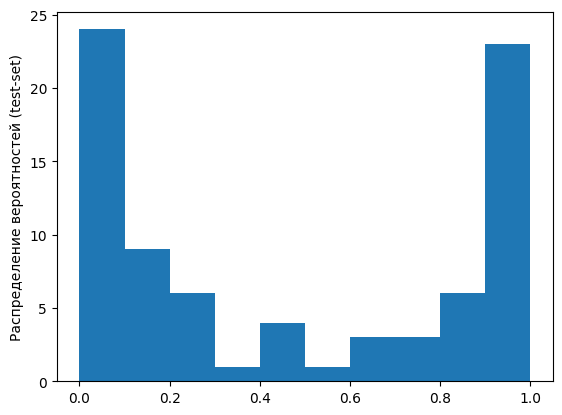

  features  importances
3      W_3     0.404465
2      W_2     0.229784
4      W_4     0.173027
1      W_1     0.137276
0      W_0     0.055448

   Neg  Pos
0   38    2
1    6   34

AUC = 0.972  Точность = 0.900



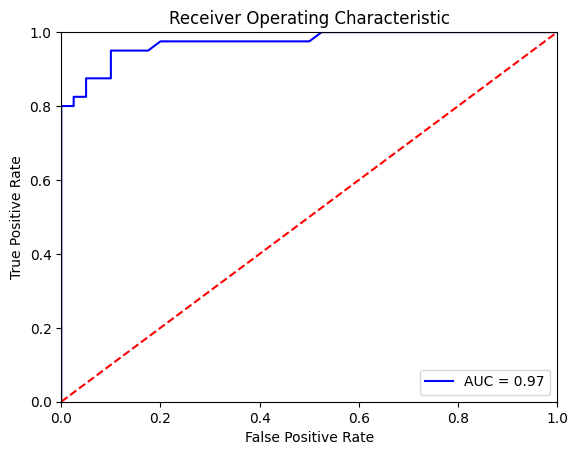

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

featureList = trainSet.drop('label', axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1] ## вероятности

## визуализируем вероятности для предсказаний
import matplotlib.pyplot as plt
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()

## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

# confusion matrix
CM = confusion_matrix(res['label'], res['pred'])

CM_DF = pd.DataFrame(data=CM, columns = ['Neg', 'Pos'])
print(CM_DF)

## считаем матрицу ошибок
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0]
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()